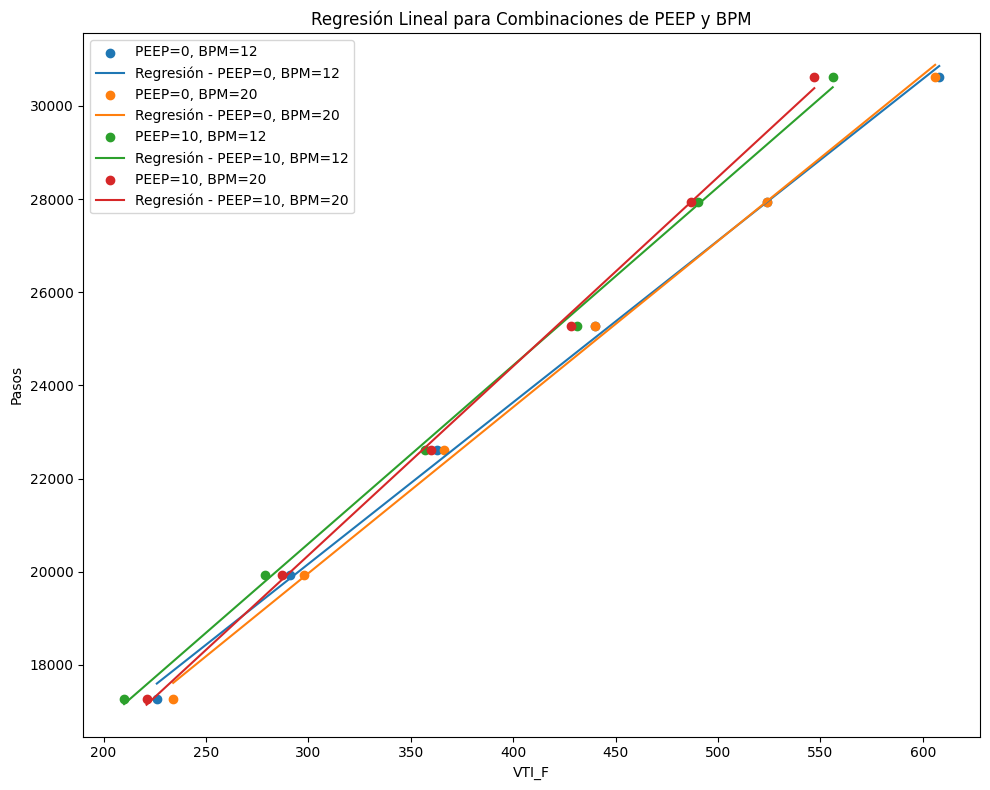

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular los coeficientes de regresión manualmente
def regresion_manual(X, y):
    # Agregar una columna de unos para el término independiente
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Calcular los coeficientes utilizando la fórmula de la pseudo inversa
    coeficientes = np.linalg.pinv(X.T @ X) @ X.T @ y

    return coeficientes  

# Función para predecir los valores de y
def predecir(X, coeficientes):
    Xm = np.hstack([np.ones((X.shape[0], 1)), X])
    return Xm @ coeficientes

# Calcular métricas de evaluación manualmente
def rmse(y_true, y_pred):
    error = y_true - y_pred
    return np.sqrt(np.mean(error ** 2))

def r2F(y_true, y_pred):
    numerador = ((y_true - y_pred) ** 2).sum()
    denominador = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (numerador / denominador)

# Función para ajustar el modelo y evaluarlo
def ajustar_evaluar_modelo(X, y):
    coeficientes = regresion_manual(X, y)
    y_pred = predecir(X, coeficientes)
    r2_ = r2F(y, y_pred)
    rmse_val = rmse(y, y_pred)
    return coeficientes, y_pred, r2_, rmse_val

# Cargar los datos
data = pd.read_csv('Mediciones.csv')

# Filtrar datos para opción 6
valores_peep_unicos = data['PEEP'].unique()
valores_bpm_unicos = data['BPM'].unique()

# Crear una figura para el gráfico combinado
fig, ax = plt.subplots(figsize=(10, 8))

# Modelos para cada combinación de PEEP y BPM
for peep in valores_peep_unicos:
    for bpm in valores_bpm_unicos:
        datos_subset = data[(data['PEEP'] == peep) & (data['BPM'] == bpm)]
        X_subset = datos_subset[['VTI_F']]
        y_subset = datos_subset['Pasos']
        coeficientes_subset, y_pred_subset, r2_subset, rmse_subset = ajustar_evaluar_modelo(X_subset, y_subset)
        
        # Graficar
        ax.scatter(X_subset, y_subset, label=f"PEEP={peep}, BPM={bpm}")
        ax.plot(X_subset, y_pred_subset, label=f"Regresión - PEEP={peep}, BPM={bpm}")

# Configurar título y etiquetas
ax.set_title('Regresión Lineal para Combinaciones de PEEP y BPM')
ax.set_xlabel('VTI_F')
ax.set_ylabel('Pasos')
ax.legend()

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()